In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from random import seed, random, gauss
import statsmodels.api as sm


/Users/manguito/.virtualenvs/myEnv/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)


### OLS with Stochastic Gradient Descent

In [2]:
# Generate data
n = 100
np.random.seed(0)
X = 2.5 * np.random.randn(n) + 1.5   # Array of n values with mean = 1.5, stddev = 2.5
res = 0.5 * np.random.randn(n)       # Generate n residual terms
y = 2 + 0.3 * X + res                  # Actual values of Y

# Create pandas dataframe to store our X and y values
df = pd.DataFrame(
    {'X': X,
     'y': y}
)

# Show the first five rows of our dataframe
df.head()

,X,y
0,5.910131,4.714615
1,2.500393,2.076238
2,3.946845,2.548811
3,7.102233,4.615368
4,6.168895,3.264107


In [3]:
# Calculate the mean of X and y
xmean = np.mean(X)
ymean = np.mean(y)

# Calculate the terms needed for the numator and denominator of beta
df['xycov'] = (df['X'] - xmean) * (df['y'] - ymean)
df['xvar'] = (df['X'] - xmean)**2

# Calculate beta and alpha
beta = df['xycov'].sum() / df['xvar'].sum()
alpha = ymean - (beta * xmean)
print(f'alpha = {alpha}')
print(f'beta = {beta}')

alpha = 2.0031670124623426
beta = 0.3229396867092763


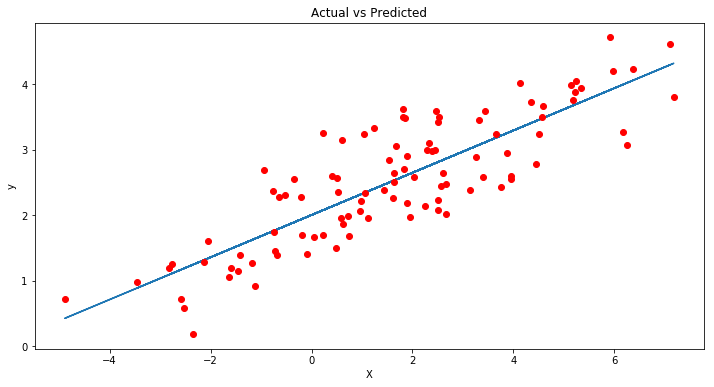

In [4]:
ypred = alpha + beta * X

# Plot regression against actual data
plt.figure(figsize=(12, 6))
plt.plot(X, ypred)     # regression line
plt.plot(X, y, 'ro')   # scatter plot showing actual data
plt.title('Actual vs Predicted')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [5]:
# Make a prediction with coefficients
def predict(row, coefficients):
	yhat = coefficients[0]
	for i in range(len(row)-1):
		yhat += coefficients[i + 1] * row[i]
	return yhat
 
# Estimate linear regression coefficients using stochastic gradient descent
def coefficients_sgd(train, l_rate, n_epoch):
	coef = [0.0 for i in range(len(train[0]))]
	for epoch in range(n_epoch):
		sum_error = 0
		for row in train:
			yhat = predict(row, coef)
			error = yhat - row[-1]
			sum_error += error**2
			coef[0] = coef[0] - l_rate * error
			for i in range(len(row)-1):
				coef[i + 1] = coef[i + 1] - l_rate * error * row[i]
		print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, l_rate, sum_error))
	return coef
 
# # Calculate coefficients
# dataset = [[1, 1], [2, 3], [4, 3], [3, 2], [5, 5]]
dataset = np.array(df[['X','y']])
l_rate = 0.001
n_epoch = 50
coef = coefficients_sgd(dataset, l_rate, n_epoch)
print(coef)
# df.head()

>epoch=0, lrate=0.001, error=468.733
>epoch=1, lrate=0.001, error=258.425
>epoch=2, lrate=0.001, error=206.738
>epoch=3, lrate=0.001, error=180.854
>epoch=4, lrate=0.001, error=160.966
>epoch=5, lrate=0.001, error=143.946
>epoch=6, lrate=0.001, error=129.113
>epoch=7, lrate=0.001, error=116.156
>epoch=8, lrate=0.001, error=104.837
>epoch=9, lrate=0.001, error=94.950
>epoch=10, lrate=0.001, error=86.314
>epoch=11, lrate=0.001, error=78.772
>epoch=12, lrate=0.001, error=72.184
>epoch=13, lrate=0.001, error=66.430
>epoch=14, lrate=0.001, error=61.404
>epoch=15, lrate=0.001, error=57.015
>epoch=16, lrate=0.001, error=53.181
>epoch=17, lrate=0.001, error=49.832
>epoch=18, lrate=0.001, error=46.907
>epoch=19, lrate=0.001, error=44.352
>epoch=20, lrate=0.001, error=42.120
>epoch=21, lrate=0.001, error=40.171
>epoch=22, lrate=0.001, error=38.468
>epoch=23, lrate=0.001, error=36.980
>epoch=24, lrate=0.001, error=35.681
>epoch=25, lrate=0.001, error=34.545
>epoch=26, lrate=0.001, error=33.554
>e

Compare to coefficient estimates from statsmodels

In [8]:
mod = sm.OLS(df.y,sm.add_constant(df['X']))
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     245.5
Date:                Thu, 10 Dec 2020   Prob (F-statistic):           1.93e-28
Time:                        15:28:41   Log-Likelihood:                -75.359
No. Observations:                 100   AIC:                             154.7
Df Residuals:                      98   BIC:                             159.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0032      0.062     32.273      0.000       1.880       2.126
X              0.3229      0.021     15.669      0.000       0.282       0.364
==============================================================================
Omnibus:                        5.184   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.075   Jarque-Bera (JB):                3.000
Skew:                           0.210   Prob(JB):                        0.223
Kurtosis:                       2.262   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""